## Reto 4: Gráficas de Barras Apiladas

### 1. Objetivos:
- Aprender a generar e interpretar gráficas de barras apiladas
 
---
    
### 2. Desarrollo:

### a) Uso de tierra de propiedades en venta en Melbourne, Australia

Ya usamos un treemap para visualizar el uso de tierra de propiedades en venta en Melbourne, Australia. Vamos a realizar el mismo análisis pero ahora utilizando gráficas de barras apiladas, para ver qué diferencias y similitudes tienen. Queremos visualizar lo mismo que en el Reto 1: después de segmentar nuestros datos por regiones y por tipos de propiedad, ¿cómo se compara el uso de tierra de cada uno con los demás?

El Reto consiste en dos partes. La primera parte es la siguiente:

1. Lee el dataset 'melbourne_housing-clean.csv'.
2. Realiza una gráfica de barras convencional donde el eje `x` sea el nombre de la región ('region_name') y el eje `y` sea la suma total del 'land_size' de todas las propiedades que se encuentran en esa región. Asegúrate de que las barras estén ordenadas de mayor a menor.
3. Asegúrate de que el título y los nombres de ejes sean adecuados. Además elige una paleta de colores agradable para las barras. Ten cuidado con los nombres de los tics en el eje `x`: si quedan muy apretados, tendrás que girarlos para que sean legibles.

La segunda parte del Reto es la siguiente:

1. Vamos ahora a realizar una segunda agrupación. Además de agrupar tus datos por región, también agrúpalos por tipo de propiedad.
2. Realiza una gráfica de barras apilada con las siguientes características:

  a) El eje `x` son los nombres de las regiones
  b) El eje `y` es el total de 'land_size' de todas las propiedades contenidas en cada región
  c) Cada barra estará dividida en 3 partes (cuando aplique), una parte por cada tipo de propiedad
  
Lo que estamos obteniendo entonces es la misma gráfica de barras de la primera parte, pero con cada barra segmentada por tipo de propiedad. De esta manera es fácil ver la contribución que tiene cada tipo de propiedad al total de 'land_size' en cada región.
3. Asegúrate como siempre de que la gráfica sea agradable y comprensible.

Comenta tus hallazgos con tus compañeros y la experta. Específicamente discutan las preguntas siguientes: ¿Cómo se compara esta visualización con el treemap que realizamos en el Reto 1? ¿Cuál te parece más clara de las dos? ¿Hay información en cada una de las gráficas que no es posible extraer de la otra? ¿En qué contexto utilizarías tú cada una de ellas?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/jaeem006/beduadp/master/Datasets/melbourne_housing-clean.csv", index_col=0)
df['type'] = df['type']\
             .apply(lambda x: dict(h='house', u='unit-duplex',t='townhouse')[x])
df.sample(3)

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
3612,Kew,1/204 Brougham St,3,townhouse,800000.0,S,LITTLE,12/11/2016,5.6,3101.0,3.0,2.0,2.0,848.0,Boroondara,-37.7960,145.0324,Southern Metropolitan,10331.0
7212,Ormond,7/21 Lillimur Rd,1,unit-duplex,447000.0,S,Ray,27/11/2016,11.8,3204.0,1.0,1.0,1.0,0.0,Glen Eira,-37.9016,145.0414,Southern Metropolitan,3578.0
2959,Gowanbrae,2 Mirrim Pl,4,house,802500.0,S,Nelson,12/11/2016,13.6,3043.0,4.0,2.0,2.0,0.0,Moreland,-37.7050,144.9004,Western Metropolitan,1071.0


### Parte 1

1. Agrupar por `'region_name'` y obtener la suma total de `'land_size'`

In [2]:
series_melbourne_region_land = df.query('council_area == "Melbourne"')\
                               .groupby('region_name')\
                               ['land_size'].sum()\
                               .sort_values(ascending=False)

In [3]:
series_melbourne_region_land

region_name
Northern Metropolitan         142094.0
Southern Metropolitan          60295.0
Western Victoria                6402.0
South-Eastern Metropolitan      5984.0
Western Metropolitan            4212.0
Eastern Metropolitan             176.0
Eastern Victoria                   0.0
Name: land_size, dtype: float64

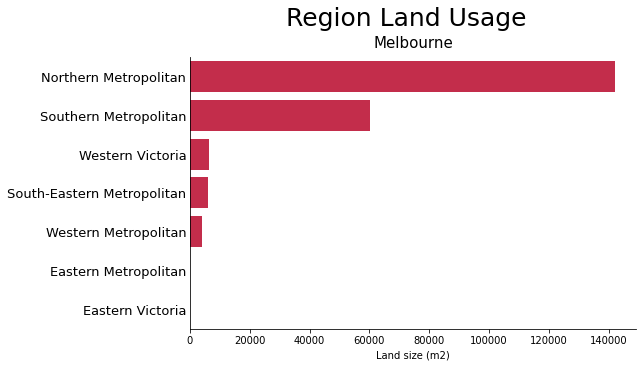

In [4]:
# Crear grafica de barras
fig,ax = plt.subplots(figsize = (8,5))

sns.barplot(y = series_melbourne_region_land.index,
            x = series_melbourne_region_land,
            color = 'crimson',
            ax = ax)
ax.set_ylabel(None)
ax.set_xlabel("Land size (m2)")
fig.suptitle("Region Land Usage", size = 25, y = 1.02)
ax.set_title("Melbourne", size = 15, pad = 10)
ax.yaxis.set_tick_params(labelsize = 13)
ax.tick_params(axis = 'y', length = 0)
sns.despine()

### Parte 2

In [5]:
colour_palette = ['#F94144', '#90BE6D', '#577590']

In [12]:
df_2 = df.query("council_area == 'Melbourne'")\
         .groupby(['region_name','type'])\
         [['land_size']].sum()\
         .unstack(level=1)\
         .fillna(0)
df_2 = df_2.loc[:,('land_size')]
df_2['total'] = df_2['house'] + df_2['townhouse'] + df_2['unit-duplex']
df_2 = df_2.sort_values('total', ascending = True)

In [13]:
df_2

type,house,townhouse,unit-duplex,total
region_name,,,,
Eastern Victoria,0.0,0.0,0.0,0.0
Eastern Metropolitan,176.0,0.0,0.0,176.0
Western Metropolitan,2216.0,0.0,1996.0,4212.0
South-Eastern Metropolitan,5984.0,0.0,0.0,5984.0
Western Victoria,4267.0,0.0,2135.0,6402.0
Southern Metropolitan,8978.0,181.0,51136.0,60295.0
Northern Metropolitan,31910.0,8072.0,102112.0,142094.0


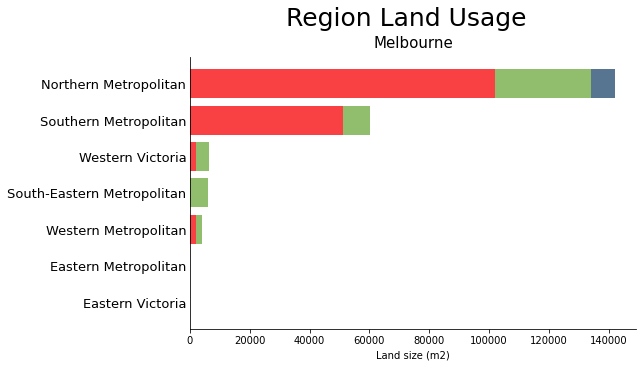

In [14]:
fig, ax = plt.subplots(figsize = (8,5))

ax.barh(y = df_2.index,
        width = df_2['unit-duplex'],
        color = colour_palette[0])
ax.barh(y = df_2.index,
        width = df_2['house'],
        color = colour_palette[1],
        left = df_2['unit-duplex'])
ax.barh(y = df_2.index,
        width = df_2['townhouse'],
        color = colour_palette[2],
        left = df_2['unit-duplex'] + df_2['house'])
ax.set_ylabel(None)
ax.set_xlabel("Land size (m2)")
fig.suptitle("Region Land Usage", size = 25, y = 1.02)
ax.set_title("Melbourne", size = 15, pad = 10)
ax.yaxis.set_tick_params(labelsize = 13)
ax.tick_params(axis = 'y', length = 0)
sns.despine()